In [2]:
import scipy
import matplotlib.pyplot as plt
import numpy as np

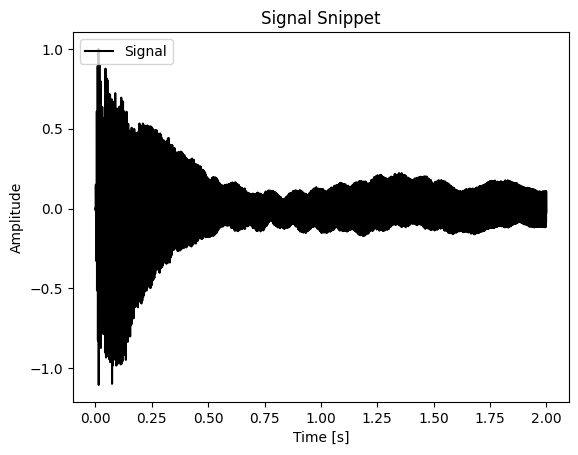

In [41]:
# Opening file,
sample_rate, signal_data = scipy.io.wavfile.read("audio_db/C4vL.wav")
time = np.linspace(0., signal_data.shape[0]/sample_rate, signal_data.shape[0])

# Cutting audio snippet,
signal_data, time = signal_data[0:2*sample_rate, :], time[0:2*sample_rate]

# Averaging channels into one,
signal_data = signal_data.mean(axis = 1)

# Normalising,
signal_data = signal_data/np.max(signal_data)


# Plotting signal,
plt.plot(time, signal_data, label = "Signal", color = "black")
plt.title("Signal Snippet")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend(loc = "upper left")
plt.show()

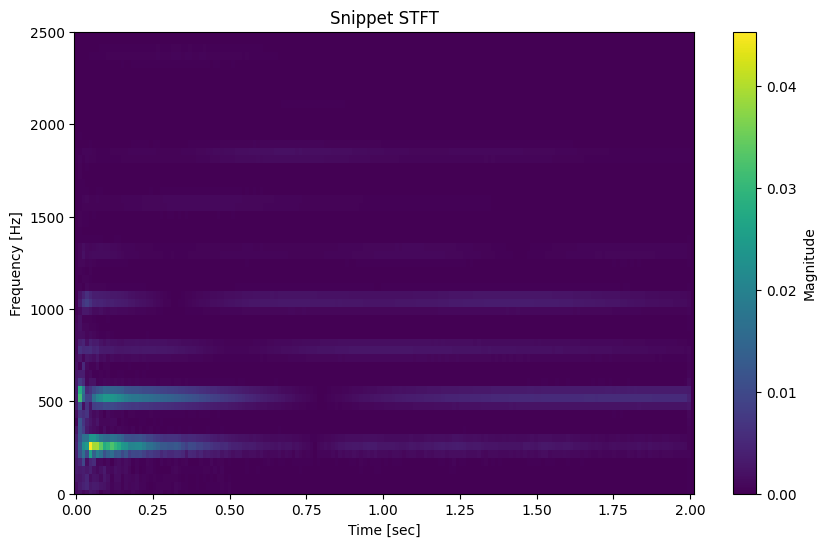

In [42]:
# Calculate the STFT of the signal
frequencies, times, Zxx = scipy.signal.stft(signal_data, fs = sample_rate, nperseg = 1024, scaling = "psd")

# Plot the STFT magnitude
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, np.abs(Zxx))
plt.title("Snippet STFT")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [sec]")
plt.colorbar(label="Magnitude")
plt.ylim(0, 2500)
plt.show()